In [303]:
import sys
if not sys.argv[1] == "-f":
    path = sys.argv[1]
    IF = "01"
    mode = "commandline"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    path = "/home/amigos/seigyo/hdd4/HDD8_copy/observation/otf/otf_2019/n20191201033807_12CO_2-1_otf_OriKL"
    path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191218010049_12CO_2-1_otf_OriKL/"
    path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191218021902_12CO_2-1_otf_OriKL/"
    path= "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191220014021_12CO_2-1_otf_OriKL/"
    path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191220024521_12CO_2-1_otf_OriKL/"
    path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191215032030_12CO_2-1_otf_OriKL/"
    savedir = "/home/amigos/seigyo/analy/shiotani/nasco/raw/"
    mode = "notebook"
    %matplotlib inline

In [182]:
sys.path.append("/home/amigos/seigyo/analy/shiotani/git/analy_n2data/")

In [3]:
import necstdb
import numpy
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
from numpy import deg2rad
from tqdm import tqdm
import n2analy
import xarray as xr
from scipy import interpolate#dp shift

In [4]:
from datetime import datetime
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, FK5, AltAz, Galactic
import astropy.units as u
#Parameter
latitude = -22.96995611
longitude = -67.70308139
height = 4863.85
nanten2 = EarthLocation(lat = latitude*u.deg, lon = longitude*u.deg, height = height*u.m)
from numpy import deg2rad, sin

In [379]:
plt.rcParams["font.family"] = "Arial,freesans"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 20#23
plt.rcParams["mathtext.fontset"] = "stix" 

In [355]:
ra, dec, ant_time = n2analy.get_radec(os.path.join(path, "wc_list.txt"))

In [324]:
mask = ra > 82.8

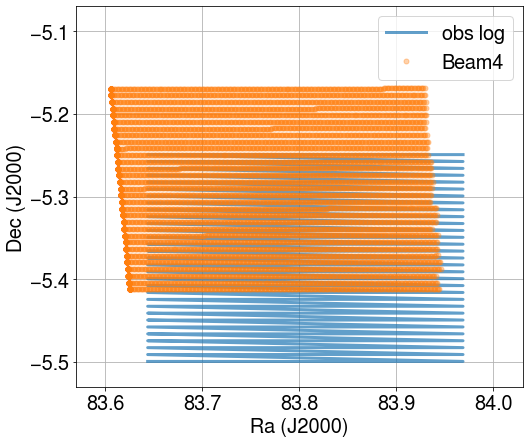

In [380]:
#みたいだけ
# ra = numpy.array(ra)/3600
# dec = numpy.array(dec)/3600
# ra = numpy.where(ra < 0, ra+360, ra)#問題
plt.figure(figsize=(8, 7))
plt.xlim(83.57, 84.03)
plt.ylim(-5.53, -5.07)
plt.xlabel("Ra (J2000)")
plt.ylabel("Dec (J2000)")
plt.grid()
plt.plot(ra[mask], dec[mask], label="obs log", alpha=0.7, linewidth=3)
#plt.plot(ra, dec, label="obs log", alpha=0.7)
plt.plot(hosei_100ra, hosei_100dec, ".", label="Beam4", alpha=0.35, markersize=10)
plt.legend()
#plt.show()

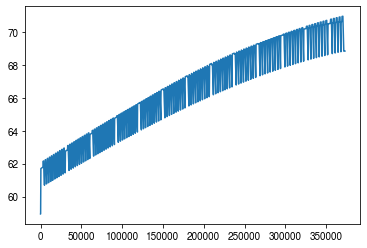

In [228]:
#気象情報の確認
nw = necstdb.opendb(path)
_nw = nw.open_table("status_encoder")
encoder_data = _nw.read()
encoder_data = numpy.array(encoder_data)
plt.plot(encoder_data.T[2]/3600)
xffts_az = numpy.array(encoder_data.T[1]/3600)
xffts_el = numpy.array(encoder_data.T[2]/3600)

In [330]:
IF = "12"
data = n2analy.get_data(path, IF)



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 34.56it/s]

read end
HOT 1.0
HOT 10.0
HOT 11.0
HOT 12.0
HOT 13.0
HOT 14.0
HOT 15.0
HOT 17.0
HOT 18.0
HOT 19.0
HOT 2.0
HOT 20.0
HOT 21.0
HOT 22.0
HOT 23.0
HOT 25.0
HOT 26.0
HOT 27.0
HOT 28.0
HOT 29.0
HOT 3.0
HOT 30.0
HOT 4.0
HOT 5.0
HOT 6.0
HOT 7.0
HOT 9.0
1.0 OFF 0.0 0.0
10.0 OFF 0.0 0.0
11.0 OFF 0.0 0.0
12.0 OFF 0.0 0.0
13.0 OFF 0.0 0.0
14.0 OFF 0.0 0.0
15.0 OFF 0.0 0.0
17.0 OFF 0.0 0.0
18.0 OFF 0.0 0.0
19.0 OFF 0.0 0.0
2.0 OFF 0.0 0.0
20.0 OFF 0.0 0.0
21.0 OFF 0.0 0.0
22.0 OFF 0.0 0.0
23.0 OFF 0.0 0.0
25.0 OFF 0.0 0.0
26.0 OFF 0.0 0.0
27.0 OFF 0.0 0.0
28.0 OFF 0.0 0.0
29.0 OFF 0.0 0.0
3.0 OFF 0.0 0.0
30.0 OFF 0.0 0.0
31.0 OFF 0.0 0.0
4.0 OFF 0.0 0.0
5.0 OFF 0.0 0.0
6.0 OFF 0.0 0.0
7.0 OFF 0.0 0.0
9.0 OFF 0.0 0.0
31.0 ON 0.0 0.0


In [332]:
data["scannum"] = data["scannum"].astype(numpy.float32).astype(numpy.int32)

In [333]:
#chopper wheel

In [334]:
off = []
scanmasks = numpy.unique(data["scannum"])
for i in scanmasks:
    _off = n2analy.get_maskedcube(data, "OFF", i)
    off.append(numpy.mean(_off.values, axis=0))

off = numpy.array(off)
offindex = numpy.where(numpy.mean(off, axis=1)>0)[0]
newoff = []
for i in range(len(off)):
    if i in offindex:
        newoff.append(off[i])
        nh = off[i]
    else:
        newoff.append(nh)
off = newoff

# In[ ]:

#hot integration
hot = []
for i in scanmasks:
    _hot = n2analy.get_maskedcube(data, "HOT", i)
    hot.append(numpy.mean(_hot.values, axis=0))

hot = numpy.array(hot)
hotindex = numpy.where(numpy.mean(hot, axis=1)>0)[0]
newhot = []
for i in range(len(hot)):
    if i in hotindex:
        newhot.append(hot[i])
        nh = hot[i]
    else:
        newhot.append(nh)
hot = newhot

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/l

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater


In [335]:
# #off integration
# off = []
# scanmasks = numpy.unique(data["scannum"])
# for i in scanmasks:
#     _off = n2analy.get_maskedcube(data, "OFF", i)
#     off.append(numpy.mean(_off, axis=0))

In [336]:
# #hot integration
# hot = []
# for i in scanmasks:
#     _hot = n2analy.get_maskedcube(data, "HOT", i)
#     hot.append(numpy.mean(_hot, axis=0))

In [337]:
off

[array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.38505098e+10, 1.38505098e+10, 1.38505098e+10, ...,
        1.67478341e+11, 1.67324453e+11, 1.70131055e+11]),
 array([1.39132237e+10, 1.39132237e+10, 1.391322

In [338]:
onmask = data["obsmode"] == "ON"
on_data = data[onmask]

In [339]:
tastar_list = []
for i in tqdm(range(len(on_data["scannum"]))):
    scannum = int(on_data["scannum"][i])
    tastar_list.append(numpy.array(n2analy.chopper_wheel(on_data[i], off[scannum], hot[scannum], 300)))



  0%|          | 0/8128 [00:00<?, ?it/s]

  1%|          | 80/8128 [00:00<00:10, 791.41it/s]

  2%|▏         | 160/8128 [00:00<00:10, 792.91it/s]

  3%|▎         | 241/8128 [00:00<00:09, 795.19it/s]

  4%|▍         | 318/8128 [00:00<00:09, 786.97it/s]

  5%|▍         | 399/8128 [00:00<00:09, 790.74it/s]

  6%|▌         | 480/8128 [00:00<00:09, 794.00it/s]

  7%|▋         | 558/8128 [00:00<00:09, 789.56it/s]

  8%|▊         | 632/8128 [00:00<00:09, 773.64it/s]

  9%|▉         | 713/8128 [00:00<00:09, 782.18it/s]

 10%|▉         | 792/8128 [00:01<00:09, 782.23it/s]

 11%|█         | 872/8128 [00:01<00:09, 787.07it/s]

 12%|█▏        | 953/8128 [00:01<00:09, 791.72it/s]

 13%|█▎        | 1032/8128 [00:01<00:09, 779.61it/s]

 14%|█▎        | 1112/8128 [00:01<00:08, 782.92it/s]

 15%|█▍        | 1192/8128 [00:01<00:08, 786.13it/s]

 16%|█▌        | 1271/8128 [00:01<00:08, 783.02it/s]

 17%|█▋        | 1351/8128 [00:01<00:08, 786.97it/s]

 18%|█▊        | 1431/8128 [00:01<00:08, 790.69it/s

In [238]:
tastar_list = numpy.array(tastar_list)

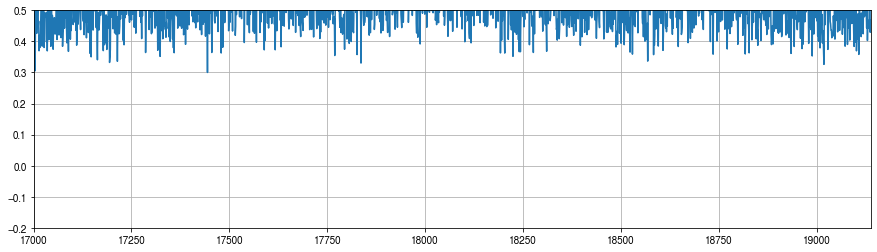

In [239]:
plt.figure(figsize=(15, 4))
plt.plot(numpy.mean(tastar_list, axis=0))
plt.ylim(-0.2,0.5)
plt.xlim(17000, 25000-6863+1000)
plt.grid()

In [240]:
#OriKL
# lamda_on = 83.80613*3600
# #lamda_on = 84.05613 *3600
# grid = 30
# beta_on = -5.374320*3600
# N=31

# #M17SW
# lamda_on = -84.9232  *3600
# grid = 30
# beta_on =  -16.2003 *3600
# N=31

In [241]:
#azel_grid = n2analy.make_grid(lamda_on, beta_on, N, grid)

In [340]:
index = []
xffts_timestamp = numpy.array(data[onmask]["t"])
for i in range(len(xffts_timestamp)):
    try:
        a = numpy.where(ant_time >  xffts_timestamp[i])
        #print(a)
        index.append(a[0][0])
    except Exception as e:
        print(e, i)

In [341]:
ant_time = numpy.array(ant_time)

diff_ra = ra[1:] - ra[:-1]
diff_dec = dec[1:] - dec[:-1]
diff_time = ant_time[1:] - ant_time[:-1]

In [342]:
onmask = data["obsmode"] == "ON"
offmask = data["obsmode"] == "OFF"
hotmask = data["obsmode"] == "HOT"
xffts_timestamp = numpy.array(data["t"])[onmask]

In [343]:
xffts_ra = []
xffts_dec = []
xffts_time = []
for n, i in enumerate(index):
    try:
        xffts_ra.append((diff_ra[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + ra[i-1])#i-1
        xffts_dec.append((diff_dec[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + dec[i-1])#i-1
        xffts_time.append(xffts_timestamp[n])
    except Exception as e:
        print(e, i)
        
xffts_ra = numpy.array(xffts_ra)
xffts_dec = numpy.array(xffts_dec)

In [344]:
#100GHz 補正
xffts_ra

array([83.64363   , 83.64363   , 83.64363   , ..., 83.9634486 ,
       83.9648251 , 83.96620154])

In [345]:
_time = [datetime.utcfromtimestamp(i) for i in xffts_time]
on_coord = SkyCoord(xffts_ra, xffts_dec, frame="fk5", unit="deg", location=nanten2, obstime=_time)# pressure=press, obswl=lamda, relative_humidity=humi, temperature=temperature)
altaz_coord = on_coord.transform_to(AltAz)

In [346]:
#XFFTSのtimestampの時に望遠鏡が向いている方向（器差補正なし）
_xffts_az = altaz_coord.az.deg
_xffts_el = altaz_coord.alt.deg

In [347]:
#beam4
dAz = -300.303 * sin(deg2rad(_xffts_el - 5.398))
dEl = -356.607 * sin(deg2rad(_xffts_el + 83.07))

# #beam3
# dAz = -296.25 * sin(deg2rad(xffts_el + 92.81))
# dEl = 301.31 * sin(deg2rad(xffts_el - 2.25))

In [348]:
#100Gに回転の補正を加える
_dAz = dAz/numpy.cos(deg2rad(_xffts_el))

In [349]:
hosei_100Gaz = _xffts_az + _dAz/3600#+
hosei_100Gel = _xffts_el + dEl/3600#+

In [350]:
azel_coord = SkyCoord(hosei_100Gaz, hosei_100Gel, frame="altaz", unit="deg", location=nanten2, obstime=_time)# pressure=press, obswl=lamda, relative_humidity=humi, temperature=temperature)

In [351]:
hosei_gal = azel_coord.transform_to(Galactic)
hosei_radec = azel_coord.transform_to(FK5)

In [352]:
hosei_100gal_l = hosei_gal.l.deg
hosei_100gal_b = hosei_gal.b.deg

In [353]:
hosei_100ra = hosei_radec.ra.deg
hosei_100dec = hosei_radec.dec.deg

In [256]:
#plt.plot(hosei_100ra)
#plt.plot(hosei_100dec)
tlen = len(hosei_100ra)
tlen

19067

In [257]:
tastar_list = xr.DataArray(tastar_list[:tlen], dims=["t", "GHz"],
                           coords={"t":data["t"][onmask][:tlen], "GHz":data["GHz"],
                                   "scannum":("t", data["scannum"][onmask][:tlen]),
                                  "RA":("t", hosei_100ra), "DEC":("t", hosei_100dec)})
# tastar_list = xr.DataArray(tastar_list, dims=["t", "GHz"],
#                            coords={"t":data["t"][onmask], "GHz":data["GHz"],
#                                    "scannum":("t", data["scannum"][onmask]),
#                                   "RA":("t", hosei_100gal_l), "DEC":("t", hosei_100gal_b)})

In [258]:
#Doppler tracking
from numpy import deg2rad
dp = n2analy.doppler_nanten()
vobs = [dp.calc_vobs(deg2rad(hosei_100ra[i]),deg2rad(hosei_100dec[i]), ant_time[i]) for i in tqdm(range(len(ant_time)))]



  0%|          | 0/484 [00:00<?, ?it/s]

  0%|          | 1/484 [00:00<00:50,  9.56it/s]

  0%|          | 2/484 [00:00<00:50,  9.61it/s]

  1%|          | 3/484 [00:00<00:50,  9.62it/s]

  1%|          | 4/484 [00:00<00:49,  9.64it/s]

  1%|          | 5/484 [00:00<00:49,  9.66it/s]

  1%|          | 6/484 [00:00<00:49,  9.60it/s]

  1%|▏         | 7/484 [00:00<00:49,  9.60it/s]

  2%|▏         | 8/484 [00:00<00:49,  9.56it/s]

  2%|▏         | 9/484 [00:00<00:50,  9.49it/s]

  2%|▏         | 10/484 [00:01<00:49,  9.54it/s]

  2%|▏         | 11/484 [00:01<00:49,  9.50it/s]

  2%|▏         | 12/484 [00:01<00:49,  9.48it/s]

  3%|▎         | 13/484 [00:01<00:49,  9.51it/s]

  3%|▎         | 14/484 [00:01<00:49,  9.50it/s]

  3%|▎         | 15/484 [00:01<00:49,  9.53it/s]

  3%|▎         | 16/484 [00:01<00:49,  9.47it/s]

  4%|▎         | 17/484 [00:01<00:49,  9.46it/s]

  4%|▎         | 18/484 [00:01<00:48,  9.51it/s]

  4%|▍         | 19/484 [00:01<00:49,  9.47it/s]

  4%|▍         |

 60%|█████▉    | 288/484 [00:30<00:21,  9.23it/s]

 60%|█████▉    | 289/484 [00:30<00:20,  9.34it/s]

 60%|█████▉    | 290/484 [00:30<00:20,  9.41it/s]

 60%|██████    | 291/484 [00:31<00:20,  9.48it/s]

 60%|██████    | 292/484 [00:31<00:20,  9.55it/s]

 61%|██████    | 293/484 [00:31<00:19,  9.58it/s]

 61%|██████    | 294/484 [00:31<00:19,  9.51it/s]

 61%|██████    | 295/484 [00:31<00:19,  9.53it/s]

 61%|██████    | 296/484 [00:31<00:19,  9.59it/s]

 61%|██████▏   | 297/484 [00:31<00:20,  9.22it/s]

 62%|██████▏   | 298/484 [00:31<00:19,  9.34it/s]

 62%|██████▏   | 299/484 [00:31<00:19,  9.45it/s]

 62%|██████▏   | 300/484 [00:31<00:19,  9.50it/s]

 62%|██████▏   | 301/484 [00:32<00:19,  9.54it/s]

 62%|██████▏   | 302/484 [00:32<00:18,  9.58it/s]

 63%|██████▎   | 303/484 [00:32<00:19,  9.07it/s]

 63%|██████▎   | 304/484 [00:32<00:19,  9.23it/s]

 63%|██████▎   | 305/484 [00:32<00:19,  9.35it/s]

 63%|██████▎   | 306/484 [00:32<00:18,  9.45it/s]

 63%|██████▎   | 307/484 [00:32

In [259]:
vobs = numpy.array(vobs)
_diff_vobs = vobs[1:] - vobs[:-1]

In [260]:
_vobs = []
for n, i in enumerate(index):
    try:
        _vobs.append((_diff_vobs[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + vobs[i-1])#i-1
    except Exception as e:
        print(e)
_vobs = numpy.array(_vobs)

In [261]:
_vobs

array([-20.81527295, -20.8152763 , -20.81527974, ..., -20.94495822,
       -20.94496173, -20.94496544])

In [262]:
#rx info
first_lo = 17.4452003333
#first_lo = 17.499998000
second = 9.5
second = 4.0
#second = 8.97
rf13CO_1_0= 110.201353
print(n2analy.rf12CO_1_0)
#print(first_lo*6*GHz)
from astropy.units import GHz
print(n2analy.rf12CO_1_0 - first_lo*6*GHz - second*GHz)
print(rf13CO_1_0*GHz - first_lo*6*GHz - second*GHz)
#center_ch = 1.1*32768/2
#center_ch = 1.530151000199993*32768/2#13CO1-0 
center_ch = 1.110971*32768/2#C18O1-0
#center_ch = 1.1*32768/2
#delta_dv = 0.15873765#13CO 2-1          #0.165/2
#delta_dv = 0.16604043#13CO1-0
delta_dv = 0.16667442#C18O1-0
from astropy.constants import c
c*((2*GHz/32768)/rf13CO_1_0*GHz)

115.271204 GHz
6.600002000199993 GHz
1.530151000199993 GHz


<Quantity 166.04042526 GHz2 m / s>

In [263]:
start = 0
end = delta_dv*32768
dparray = numpy.arange(start, end, delta_dv)*-1

In [264]:
_dparray = dparray + center_ch*delta_dv
shift_ch = _vobs/delta_dv

In [265]:
shift_ch

array([-124.88582803, -124.8858481 , -124.88586875, ..., -125.66390342,
       -125.66392452, -125.66394676])

In [266]:
_ch = numpy.linspace(0, 32768, 32768)
dpshift_tastar = []
xx = tastar_list
for i in tqdm(range(len(xx))):
    f = interpolate.interp1d(_ch, xx[i])
    s_tastar = f(_ch[1000:-1000] + shift_ch[i])
    #s_tastar = f(_ch[1000:-1000] + 0)
    dpshift_tastar.append(s_tastar)



  0%|          | 0/19067 [00:00<?, ?it/s]

  0%|          | 62/19067 [00:00<00:31, 610.87it/s]

  1%|          | 122/19067 [00:00<00:31, 607.13it/s]

  1%|          | 169/19067 [00:00<00:33, 556.65it/s]

  1%|          | 229/19067 [00:00<00:33, 568.95it/s]

  2%|▏         | 290/19067 [00:00<00:32, 578.10it/s]

  2%|▏         | 351/19067 [00:00<00:31, 584.91it/s]

  2%|▏         | 412/19067 [00:00<00:31, 589.27it/s]

  2%|▏         | 472/19067 [00:00<00:31, 591.84it/s]

  3%|▎         | 533/19067 [00:00<00:31, 595.12it/s]

  3%|▎         | 594/19067 [00:01<00:30, 597.16it/s]

  3%|▎         | 655/19067 [00:01<00:30, 598.47it/s]

  4%|▍         | 716/19067 [00:01<00:30, 600.00it/s]

  4%|▍         | 776/19067 [00:01<00:32, 566.80it/s]

  4%|▍         | 837/19067 [00:01<00:31, 576.82it/s]

  5%|▍         | 898/19067 [00:01<00:31, 584.52it/s]

  5%|▌         | 959/19067 [00:01<00:30, 590.01it/s]

  5%|▌         | 1020/19067 [00:01<00:30, 593.77it/s]

  6%|▌         | 1081/19067 [00:01<00

 84%|████████▍ | 16081/19067 [00:27<00:05, 581.25it/s]

 85%|████████▍ | 16140/19067 [00:27<00:05, 581.82it/s]

 85%|████████▍ | 16199/19067 [00:27<00:04, 582.20it/s]

 85%|████████▌ | 16258/19067 [00:27<00:04, 582.47it/s]

 86%|████████▌ | 16317/19067 [00:27<00:04, 582.68it/s]

 86%|████████▌ | 16377/19067 [00:27<00:04, 586.71it/s]

 86%|████████▌ | 16437/19067 [00:27<00:04, 589.85it/s]

 87%|████████▋ | 16497/19067 [00:27<00:04, 559.58it/s]

 87%|████████▋ | 16557/19067 [00:28<00:04, 570.24it/s]

 87%|████████▋ | 16617/19067 [00:28<00:04, 578.32it/s]

 87%|████████▋ | 16677/19067 [00:28<00:04, 583.93it/s]

 88%|████████▊ | 16737/19067 [00:28<00:03, 588.20it/s]

 88%|████████▊ | 16797/19067 [00:28<00:03, 590.52it/s]

 88%|████████▊ | 16857/19067 [00:28<00:03, 592.53it/s]

 89%|████████▊ | 16917/19067 [00:28<00:03, 594.11it/s]

 89%|████████▉ | 16977/19067 [00:28<00:03, 595.16it/s]

 89%|████████▉ | 17037/19067 [00:28<00:03, 595.74it/s]

 90%|████████▉ | 17097/19067 [00:28<00:03, 582.6

In [267]:
test = numpy.array(dpshift_tastar)

(-0.2, 0.5)

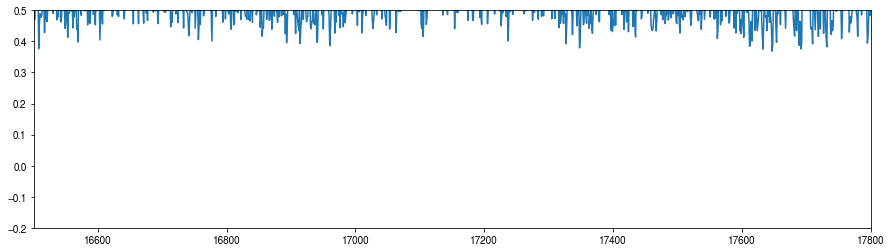

In [268]:
plt.figure(figsize=(15, 4))
plt.plot(numpy.mean(test, axis=0))
plt.xlim(16500, 17800)
plt.ylim(-0.2, 0.5)

In [269]:
for i in tqdm(range(len(dpshift_tastar))):
    #dpshift_tastar[i] = n2analy.baseline_fitting(_dparray[1000:-1000], dpshift_tastar[i], 23500,23750 , 24250, 24500)#13CO1-0
    dpshift_tastar[i] = n2analy.baseline_fitting(_dparray[1000:-1000], dpshift_tastar[i], 16500,16800 , 17500, 17800)#13CO1-0



  0%|          | 0/19067 [00:00<?, ?it/s]

  0%|          | 38/19067 [00:00<00:50, 375.99it/s]

  0%|          | 76/19067 [00:00<00:50, 374.44it/s]

  1%|          | 113/19067 [00:00<00:50, 373.05it/s]

  1%|          | 151/19067 [00:00<00:50, 372.29it/s]

  1%|          | 189/19067 [00:00<00:50, 372.04it/s]

  1%|          | 226/19067 [00:00<00:50, 371.32it/s]

  1%|▏         | 262/19067 [00:00<00:51, 366.50it/s]

  2%|▏         | 299/19067 [00:00<00:51, 367.40it/s]

  2%|▏         | 336/19067 [00:00<00:50, 368.02it/s]

  2%|▏         | 374/19067 [00:01<00:50, 368.69it/s]

  2%|▏         | 412/19067 [00:01<00:50, 369.54it/s]

  2%|▏         | 449/19067 [00:01<00:50, 365.20it/s]

  3%|▎         | 487/19067 [00:01<00:50, 367.09it/s]

  3%|▎         | 524/19067 [00:01<00:50, 367.92it/s]

  3%|▎         | 564/19067 [00:01<00:49, 375.26it/s]

  3%|▎         | 602/19067 [00:01<00:49, 373.70it/s]

  3%|▎         | 640/19067 [00:01<00:49, 368.68it/s]

  4%|▎         | 677/19067 [00:01<00:49

 55%|█████▌    | 10520/19067 [00:27<00:22, 386.62it/s]

 55%|█████▌    | 10560/19067 [00:27<00:21, 388.47it/s]

 56%|█████▌    | 10600/19067 [00:27<00:21, 389.04it/s]

 56%|█████▌    | 10640/19067 [00:27<00:21, 389.83it/s]

 56%|█████▌    | 10679/19067 [00:27<00:21, 389.06it/s]

 56%|█████▌    | 10719/19067 [00:27<00:21, 385.85it/s]

 56%|█████▋    | 10759/19067 [00:28<00:21, 387.37it/s]

 57%|█████▋    | 10798/19067 [00:28<00:21, 388.12it/s]

 57%|█████▋    | 10838/19067 [00:28<00:21, 389.13it/s]

 57%|█████▋    | 10878/19067 [00:28<00:21, 389.82it/s]

 57%|█████▋    | 10918/19067 [00:28<00:20, 390.37it/s]

 57%|█████▋    | 10958/19067 [00:28<00:20, 386.80it/s]

 58%|█████▊    | 10997/19067 [00:28<00:20, 387.42it/s]

 58%|█████▊    | 11037/19067 [00:28<00:20, 388.83it/s]

 58%|█████▊    | 11077/19067 [00:28<00:20, 389.80it/s]

 58%|█████▊    | 11116/19067 [00:28<00:20, 389.81it/s]

 59%|█████▊    | 11155/19067 [00:29<00:20, 385.55it/s]

 59%|█████▊    | 11195/19067 [00:29<00:20, 387.1

In [270]:
dptastar_list = xr.DataArray(dpshift_tastar, dims=["t", "Vlsr"][:tlen],
                           coords={"t":data["t"][onmask][:tlen], "Vlsr":_dparray[1000:-1000],
                                   "scannum":("t", data["scannum"][onmask][:tlen]),
                                  "RA":("t", hosei_100ra), "DEC":("t", hosei_100dec)})

In [179]:
dpshift_tastar = numpy.array(dpshift_tastar)

In [ ]:
dpshift_tastar[:,16000:17000]

In [271]:
#中間データ保存
dptastar_list.to_netcdf(f"{savedir}/n20191220024521_12CO_2-1_otf_OriKL_IF12_C18O1_0cdf")

In [ ]:
savedir

In [ ]:
#中間データ読み込み
tastar_cube = xr.open_dataarray(f"{savedir}/n20191201033807_OrionB5_IF07_hosei.cdf")
#tastar_cube = xr.open_dataarray("/home/amigos/seigyo/analy/shiotani/nasco/raw/n20191202015317_D2_IF11_hosei.cdf")

In [ ]:
isp =  numpy.mean(tastar_cube, axis=0)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(tastar_cube["Vlsr"],isp)
ax.set_xlim(-40, 100)
ax.set_ylim(-5, 5)
ax.set_xlabel("Vlsr (km/s)")
ax.set_ylabel("Ta* (K)")
ax.grid(True)